In [8]:
import pandas as pd 
import numpy as np

In [9]:
data = pd.read_csv('csv\Cardiovascular_Disease_Risk_Dataset.csv', sep=';')
data.head()


,PARTICIPANT ID,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,1,M,41,72.7,1.76,23.5,94.0,120.0,223,56,86,N,LOW
1,2,M,50,74.2,1.77,23.7,84.0,130.0,189,49,101,N,INTERMEDIARY
2,3,M,44,79.2,1.73,26.5,98.0,130.0,195,59,92,N,LOW
3,4,M,39,68.8,1.64,25.6,88.0,120.0,159,45,81,N,LOW
4,5,M,36,88.4,1.87,25.3,85.0,170.0,109,51,77,N,LOW


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PARTICIPANT ID           142 non-null    int64  
 1   SEX                      142 non-null    object 
 2   AGE                      142 non-null    int64  
 3   WEIGHT                   142 non-null    float64
 4   HEIGHT                   142 non-null    float64
 5   BMI                      142 non-null    float64
 6   ABDOMINAL CIRCUMFERENCE  139 non-null    float64
 7   BLOOD PRESSURE           141 non-null    float64
 8   TOTAL CHOLESTEROL        142 non-null    int64  
 9   HDL                      142 non-null    int64  
 10  FASTING BLOOD SUGAR      142 non-null    int64  
 11  SMOKING                  142 non-null    object 
 12  CVD RISK                 142 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 14.5+ KB


In [11]:
data.SMOKING.value_counts()

SMOKING
N    120
Y     22
Name: count, dtype: int64

In [12]:
# data augmentation
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer


metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Create the synthesizer with metadata
model = CTGANSynthesizer(metadata)
model.fit(data)
synthetic_data = model.sample(10000)


c:\Python310\lib\site-packages\sdv\single_table\base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Python310\lib\site-packages\sdv\single_table\base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [13]:
synthetic_data

,PARTICIPANT ID,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,59,F,52,90.1,1.66,27.6,89.0,120.0,146,69,79,Y,LOW
1,10,M,40,57.9,1.76,32.8,97.0,130.0,143,45,107,N,LOW
2,23,F,40,58.1,1.69,27.8,74.0,125.0,195,57,87,N,HIGH
3,4,M,42,96.1,1.75,32.8,76.0,120.0,158,31,92,N,LOW
4,46,M,43,48.8,1.66,29.1,111.0,130.0,124,55,90,Y,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18,M,48,58.0,1.66,28.3,92.0,120.0,174,52,110,N,LOW
9996,1,M,38,79.9,1.60,25.5,88.0,125.0,187,54,79,N,INTERMEDIARY
9997,21,M,30,63.7,1.91,29.0,72.0,100.0,239,34,86,N,LOW
9998,27,F,36,60.3,1.76,28.6,85.0,110.0,288,62,101,N,INTERMEDIARY


In [14]:
# data augmentation
from sdv.metadata import SingleTableMetadata
from sdv.multi_table.base import GaussianCopulaSynthesizer


metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data.drop('PARTICIPANT ID', axis=1))

# Create the synthesizer with metadata
model = GaussianCopulaSynthesizer(metadata, default_distribution='gaussian_kde')
model.fit(data.drop('PARTICIPANT ID', axis=1))
synthetic_data_gauss = model.sample(10000, max_tries_per_batch=300)

c:\Python310\lib\site-packages\sdv\single_table\base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Python310\lib\site-packages\sdv\single_table\base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [15]:
synthetic_data_gauss

,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,M,46,64.8,1.61,24.8,84.0,130.0,208,47,89,N,INTERMEDIARY
1,M,39,63.9,1.69,22.2,92.0,130.0,203,54,92,N,LOW
2,M,53,56.3,1.71,18.8,70.0,140.0,185,64,88,N,LOW
3,M,38,84.4,1.89,23.7,88.0,120.0,184,29,92,N,INTERMEDIARY
4,M,41,78.5,1.74,25.4,100.0,130.0,191,33,96,N,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,38,88.5,1.77,27.9,98.0,NaN,194,74,80,N,INTERMEDIARY
9996,M,39,99.8,1.82,31.0,97.0,110.0,152,24,95,N,LOW
9997,M,45,61.0,1.56,25.8,87.0,110.0,219,53,100,Y,LOW
9998,M,40,69.4,1.73,23.3,87.0,110.0,141,38,81,N,LOW


In [16]:
synthetic_data

,PARTICIPANT ID,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,59,F,52,90.1,1.66,27.6,89.0,120.0,146,69,79,Y,LOW
1,10,M,40,57.9,1.76,32.8,97.0,130.0,143,45,107,N,LOW
2,23,F,40,58.1,1.69,27.8,74.0,125.0,195,57,87,N,HIGH
3,4,M,42,96.1,1.75,32.8,76.0,120.0,158,31,92,N,LOW
4,46,M,43,48.8,1.66,29.1,111.0,130.0,124,55,90,Y,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18,M,48,58.0,1.66,28.3,92.0,120.0,174,52,110,N,LOW
9996,1,M,38,79.9,1.60,25.5,88.0,125.0,187,54,79,N,INTERMEDIARY
9997,21,M,30,63.7,1.91,29.0,72.0,100.0,239,34,86,N,LOW
9998,27,F,36,60.3,1.76,28.6,85.0,110.0,288,62,101,N,INTERMEDIARY


In [17]:
from sdv.evaluation.single_table import evaluate_quality

# Basic quality report
quality_report = evaluate_quality(
    real_data=data.drop('PARTICIPANT ID', axis=1), synthetic_data=synthetic_data_gauss, metadata=metadata )

print(quality_report)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 120.10it/s]|
Column Shapes Score: 96.23%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:00<00:00, 137.42it/s]|
Column Pair Trends Score: 91.43%

Overall Score (Average): 93.83%



In [18]:
synthetic_data_gauss

,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,M,46,64.8,1.61,24.8,84.0,130.0,208,47,89,N,INTERMEDIARY
1,M,39,63.9,1.69,22.2,92.0,130.0,203,54,92,N,LOW
2,M,53,56.3,1.71,18.8,70.0,140.0,185,64,88,N,LOW
3,M,38,84.4,1.89,23.7,88.0,120.0,184,29,92,N,INTERMEDIARY
4,M,41,78.5,1.74,25.4,100.0,130.0,191,33,96,N,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,38,88.5,1.77,27.9,98.0,NaN,194,74,80,N,INTERMEDIARY
9996,M,39,99.8,1.82,31.0,97.0,110.0,152,24,95,N,LOW
9997,M,45,61.0,1.56,25.8,87.0,110.0,219,53,100,Y,LOW
9998,M,40,69.4,1.73,23.3,87.0,110.0,141,38,81,N,LOW


In [19]:
synthetic_data_gauss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEX                      10000 non-null  object 
 1   AGE                      10000 non-null  int64  
 2   WEIGHT                   10000 non-null  float64
 3   HEIGHT                   10000 non-null  float64
 4   BMI                      10000 non-null  float64
 5   ABDOMINAL CIRCUMFERENCE  9793 non-null   float64
 6   BLOOD PRESSURE           9537 non-null   float64
 7   TOTAL CHOLESTEROL        10000 non-null  int64  
 8   HDL                      10000 non-null  int64  
 9   FASTING BLOOD SUGAR      10000 non-null  int64  
 10  SMOKING                  10000 non-null  object 
 11  CVD RISK                 10000 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 937.6+ KB


In [20]:
data.head()

,PARTICIPANT ID,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,1,M,41,72.7,1.76,23.5,94.0,120.0,223,56,86,N,LOW
1,2,M,50,74.2,1.77,23.7,84.0,130.0,189,49,101,N,INTERMEDIARY
2,3,M,44,79.2,1.73,26.5,98.0,130.0,195,59,92,N,LOW
3,4,M,39,68.8,1.64,25.6,88.0,120.0,159,45,81,N,LOW
4,5,M,36,88.4,1.87,25.3,85.0,170.0,109,51,77,N,LOW


In [54]:
[key for key in  risk_map.keys() if risk_map[key] == data['CVD RISK'][0]][0]

'INTERMEDIARY'

In [ ]:
risk_map = {'LOW': 0, 'INTERMEDIARY': 1, 'HIGH': 2}
data['CVD RISK'] = data['CVD RISK'].map(risk_map)
data['SMOKING'] = data['SMOKING'].map({'Y': 1, 'N': 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PARTICIPANT ID           142 non-null    int64  
 1   SEX                      142 non-null    object 
 2   AGE                      142 non-null    int64  
 3   WEIGHT                   142 non-null    float64
 4   HEIGHT                   142 non-null    float64
 5   BMI                      142 non-null    float64
 6   ABDOMINAL CIRCUMFERENCE  139 non-null    float64
 7   BLOOD PRESSURE           141 non-null    float64
 8   TOTAL CHOLESTEROL        142 non-null    int64  
 9   HDL                      142 non-null    int64  
 10  FASTING BLOOD SUGAR      142 non-null    int64  
 11  SMOKING                  142 non-null    int64  
 12  CVD RISK                 142 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 14.5+ KB


In [22]:
data['SEX'] = data['SEX'].map({'M': 1, 'F': 0})
data_clean = data.drop('PARTICIPANT ID', axis=1).copy()
data_clean.head()

,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,1,41,72.7,1.76,23.5,94.0,120.0,223,56,86,0,0
1,1,50,74.2,1.77,23.7,84.0,130.0,189,49,101,0,1
2,1,44,79.2,1.73,26.5,98.0,130.0,195,59,92,0,0
3,1,39,68.8,1.64,25.6,88.0,120.0,159,45,81,0,0
4,1,36,88.4,1.87,25.3,85.0,170.0,109,51,77,0,0


In [23]:
data_clean['ABDOMINAL CIRCUMFERENCE'] = data_clean['ABDOMINAL CIRCUMFERENCE'].fillna(data_clean['ABDOMINAL CIRCUMFERENCE'].median())
data_clean['BLOOD PRESSURE'] = data_clean['BLOOD PRESSURE'].fillna(data_clean['BLOOD PRESSURE'].median())
data_clean.to_csv('csv/cleaned_data.csv')

In [32]:
# data augmentation
from sdv.metadata import SingleTableMetadata
from sdv.multi_table.base import GaussianCopulaSynthesizer


metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data_clean)

# Create the synthesizer with metadata
model = GaussianCopulaSynthesizer(metadata, default_distribution='gaussian_kde')
model.fit(data_clean)
synthetic_data_gauss = model.sample(50000, max_tries_per_batch=300)
synthetic_data_gauss

c:\Python310\lib\site-packages\sdv\single_table\base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Python310\lib\site-packages\sdv\single_table\base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,SEX,AGE,WEIGHT,HEIGHT,BMI,ABDOMINAL CIRCUMFERENCE,BLOOD PRESSURE,TOTAL CHOLESTEROL,HDL,FASTING BLOOD SUGAR,SMOKING,CVD RISK
0,1,39,88.4,1.76,29.5,98.0,130.0,223,45,101,1,1
1,1,36,85.1,1.75,27.9,107.0,150.0,188,45,94,0,0
2,1,42,111.8,1.91,32.7,107.0,140.0,195,38,102,0,1
3,1,41,67.1,1.74,22.1,81.0,110.0,150,30,88,0,1
4,1,42,65.7,1.72,22.5,92.0,110.0,196,42,99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,42,95.5,1.71,32.5,109.0,120.0,218,35,95,0,1
49996,1,42,72.1,1.84,21.4,81.0,130.0,234,38,103,1,1
49997,1,37,111.8,1.85,33.1,111.0,120.0,192,48,116,0,0
49998,1,43,75.8,1.66,27.0,96.0,130.0,211,52,90,0,1


In [33]:
from sdv.evaluation.single_table import evaluate_quality

# Basic quality report
quality_report = evaluate_quality(
    real_data=data_clean, synthetic_data=synthetic_data_gauss, metadata=metadata )

print(quality_report)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 87.11it/s]|
Column Shapes Score: 96.13%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:00<00:00, 76.74it/s]|
Column Pair Trends Score: 91.71%

Overall Score (Average): 93.92%



In [28]:
synthetic_data_gauss.to_csv('syn_data.csv', index=False)

In [23]:
x_test, y_t = data_clean.drop('CVD RISK', axis=1), data['CVD RISK'] 

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEX                      142 non-null    int64  
 1   AGE                      142 non-null    int64  
 2   WEIGHT                   142 non-null    float64
 3   HEIGHT                   142 non-null    float64
 4   BMI                      142 non-null    float64
 5   ABDOMINAL CIRCUMFERENCE  142 non-null    float64
 6   BLOOD PRESSURE           142 non-null    float64
 7   TOTAL CHOLESTEROL        142 non-null    int64  
 8   HDL                      142 non-null    int64  
 9   FASTING BLOOD SUGAR      142 non-null    int64  
 10  SMOKING                  142 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 12.3 KB


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt

data = synthetic_data_gauss
X, y = data.drop('CVD RISK', axis=1), data['CVD RISK']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
model_z = ExtraTreesClassifier()

calibrated_model = CalibratedClassifierCV(model_z, method='isotonic', cv=15)
calibrated_model.fit(X_train, y_train)

# Evaluate
y_pred = calibrated_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=risk_map.keys()))
model_z.fit(X_train, y_train).score(X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

         LOW       0.71      0.84      0.77      5917
INTERMEDIARY       0.53      0.46      0.49      3452
        HIGH       0.63      0.03      0.06       631

    accuracy                           0.66     10000
   macro avg       0.63      0.44      0.44     10000
weighted avg       0.64      0.66      0.63     10000



0.6496

c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.5084 - auc: 0.6779 - loss: 2.1599 - precision: 0.5143 - recall: 0.4240 - val_accuracy: 0.5733 - val_auc: 0.7520 - val_loss: 0.9409 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
213/213 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.5704 - auc: 0.7581 - loss: 0.8963 - precision: 0.5821 - recall: 0.4552 - val_accuracy: 0.5733 - val_auc: 0.7617 - val_loss: 0.9204 - val_precision: 1.0000 - val_recall: 8.3333e-04
Epoch 3/25
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.5689 - auc: 0.7505 - loss: 0.8898 - precision: 0.5687 - recall: 0.4993 - val_accuracy: 0.5733 - val_auc: 0.7889 - val_loss: 0.8927 - val_precision: 0.6559 - val_recall: 0.4050
Epoch 4/25
213/213 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.5792 - auc: 0.7609 - loss: 0.8750 - precision: 0.5798 - recall: 0.5507 - val_accuracy: 0.5733 - val_auc: 0.7846 - val_loss: 0.8764 - val_precision: 0.5733 - val_recall: 0.5733
Epoch 5/25
2

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


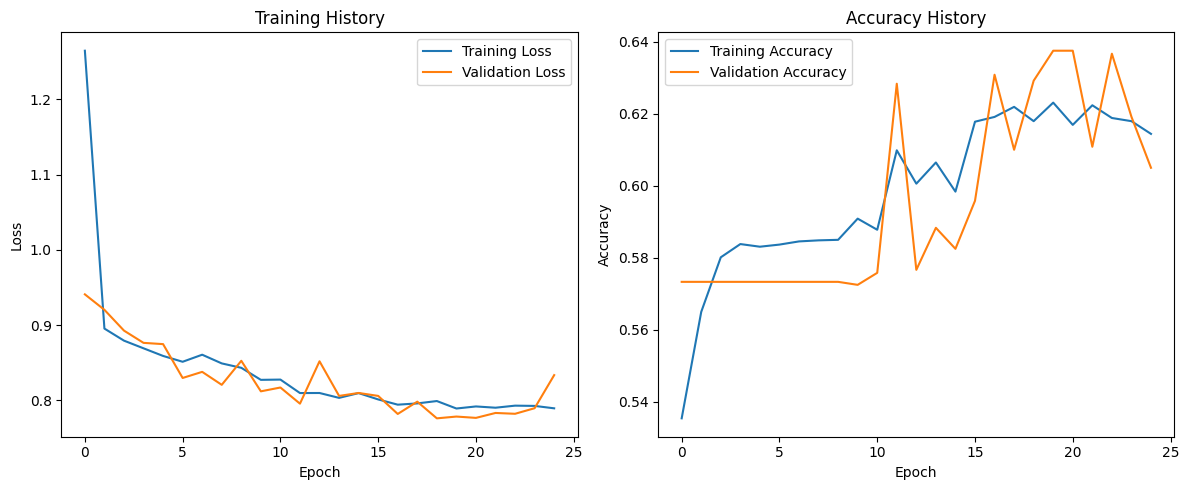

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = pd.read_csv('csv/syn_data.csv')
X, y = data.drop('CVD RISK', axis=1), data['CVD RISK']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Build DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    Dropout(0.4),
    
    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.4),
    
    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.AUC(name='auc')])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train_encoded,
    validation_split=0.15,
    epochs=25,
    callbacks=[early_stop],
)

# Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(risk_map.keys())))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()


In [52]:
import keras

keras.models.save_model(model, 'models/dnn_deep_risk.keras')

In [62]:
import joblib

joblib.dump(model_z, 'models/extra_risk.pkl')

['models/extra_risk.pkl']

c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
850/850 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.5450 - auc: 0.7255 - loss: 1.2845 - precision: 0.5512 - recall: 0.4527 - val_accuracy: 0.5904 - val_auc: 0.7976 - val_loss: 0.8343 - val_precision: 0.6411 - val_recall: 0.5098
Epoch 2/25
850/850 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.5883 - auc: 0.7793 - loss: 0.8473 - precision: 0.5919 - recall: 0.5680 - val_accuracy: 0.5904 - val_auc: 0.8096 - val_loss: 0.8253 - val_precision: 0.6028 - val_recall: 0.5817
Epoch 3/25
850/850 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.5944 - auc: 0.7990 - loss: 0.8192 - precision: 0.6263 - recall: 0.5088 - val_accuracy: 0.6235 - val_auc: 0.8196 - val_loss: 0.7996 - val_precision: 0.6832 - val_recall: 0.4848
Epoch 4/25
850/850 ━━━━━━━━━━━━━━━━━━━━ 55s 65ms/step - accuracy: 0.6122 - auc: 0.8090 - loss: 0.8037 - precision: 0.6591 - recall: 0.4957 - val_accuracy: 0.6367 - val_auc: 0.8253 - val_loss: 0.7945 - val_precision: 0.7075 - val_recall: 0.4546
Epoch 5/25
850/850 ━━━━━

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


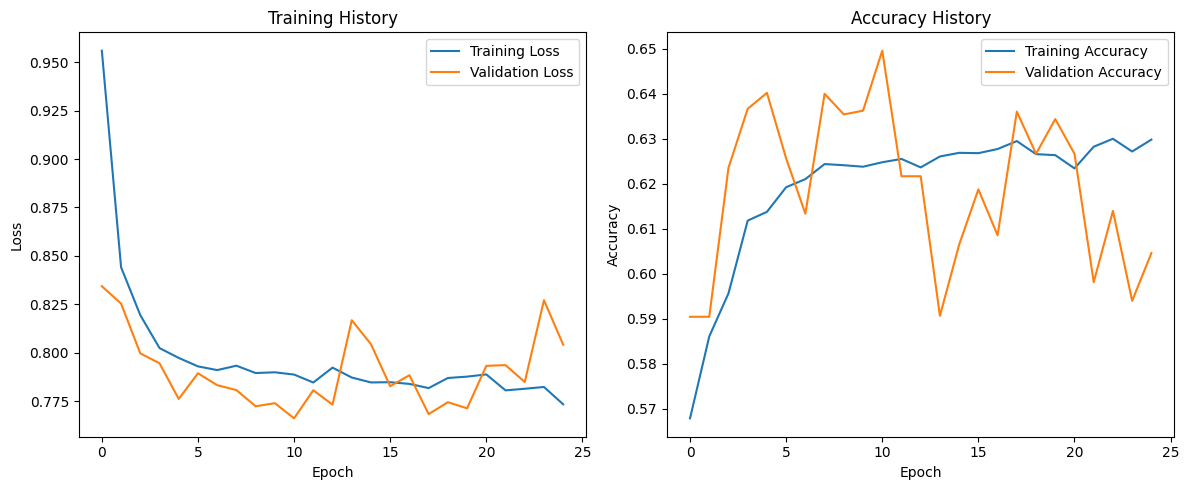

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = synthetic_data_gauss
X, y = data.drop('CVD RISK', axis=1), data['CVD RISK']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Build DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    Dropout(0.4),
    
    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.4),
    
    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.AUC(name='auc')])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train_encoded,
    validation_split=0.15,
    epochs=25,
    callbacks=[early_stop],
)

# Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(risk_map.keys())))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
model_z.predict_proba(data_clean.drop('CVD RISK', axis=1)[:3])

array([[0.58, 0.42, 0.  ],
       [0.27, 0.67, 0.06],
       [0.41, 0.57, 0.02]])

In [55]:
model.predict(data_clean.drop('CVD RISK', axis=1)[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


array([[0.6643779 , 0.3041891 , 0.03143297],
       [0.4709943 , 0.4515228 , 0.07748289],
       [0.66759974, 0.30145934, 0.03094088]], dtype=float32)

In [36]:
calibrated_model.predict_proba(data_clean.drop('CVD RISK', axis=1)[:3])

array([[0.55337538, 0.4355203 , 0.01110432],
       [0.35794929, 0.56991444, 0.07213627],
       [0.49518059, 0.46056636, 0.04425305]])

In [59]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
model_base_dnn = keras.models.load_model('models/dnn_deep_risk.keras')

bag_model = VotingClassifier(estimators=[('extra', model_z), ('cal', calibrated_model)], voting='soft', verbose=2)
bag_model.fit(X_train, y_train)
bag_model.predict_proba(data_clean.drop('CVD RISK', axis=1)[:3])

[Voting] .................... (1 of 2) Processing extra, total=   5.0s
[Voting] ...................... (2 of 2) Processing cal, total= 1.2min


array([[0.52209248, 0.46075165, 0.01715586],
       [0.37325755, 0.58016765, 0.0465748 ],
       [0.45751137, 0.48843258, 0.05405606]])

In [37]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

data = synthetic_data_gauss
X, y = data.drop('CVD RISK', axis=1), data['CVD RISK']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model_z = XGBClassifier()
xgb_model_z.fit(X_train, y_train)
xgb_model_z.predict_proba(data_clean.drop('CVD RISK', axis=1)[:3])

array([[0.6795669 , 0.3011244 , 0.01930864],
       [0.2759333 , 0.66473967, 0.05932698],
       [0.75356406, 0.22206996, 0.02436598]], dtype=float32)

In [ ]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier



bag_model = VotingClassifier(estimators=[('extra', model_z), ('cal', calibrated_model), ('xgb', xgb_model_z)], voting='hard', verbose=2)
bag_model.fit(X_train, y_train)
bag_model.predict_proba(data_clean.drop('CVD RISK', axis=1)[:3])

[Voting] .................... (1 of 3) Processing extra, total=   7.9s
[Voting] ...................... (2 of 3) Processing cal, total= 1.4min
[Voting] ...................... (3 of 3) Processing xgb, total=   1.2s


AttributeError: This 'VotingClassifier' has no attribute 'predict_proba'

In [42]:
bag_model.predict_proba(data_clean.drop('CVD RISK', axis=1)[:3])

AttributeError: This 'VotingClassifier' has no attribute 'predict_proba'

In [40]:
xgb_model.predict_proba(data_clean.drop('CVD RISK', axis=1)[:3])

array([[0.68852276, 0.29266885, 0.01880837],
       [0.13235408, 0.8349214 , 0.03272456],
       [0.5691361 , 0.4121614 , 0.0187025 ]], dtype=float32)

In [44]:
import joblib

joblib.dump(xgb_model, 'models/xgb_base.pkl')
joblib.dump(xgb_model_z, 'models/xgb_risk.pkl')


['models/xgb_risk.pkl']